# Classification: Predicting Categories

## Learning Objectives
- Understand what classification is and when to use it
- Learn to build a classification model (Logistic Regression)
- Evaluate model performance using classification metrics
- Visualize classification results with confusion matrices

## What is Classification?
Classification is a supervised learning technique used to predict categorical labels or classes. Unlike regression (which predicts numbers), classification predicts categories like "pass/fail", "spam/not spam", or "disease/no disease".


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## Step 1: Load and Explore the Data

We'll use a student dataset to predict whether a student will pass an exam based on hours studied, previous score, and attendance.


In [17]:
# Load the dataset
df = pd.read_csv('student_scores.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())

# Check class distribution
print("\nClass distribution (pass_exam):")
print(df['pass_exam'].value_counts())
print(f"\nPercentage of each class:")
print(df['pass_exam'].value_counts(normalize=True) * 100)


First 5 rows of the dataset:
   hours_studied  previous_score  attendance  pass_exam
0            3.6              71        0.63          1
1            2.2              61        0.41          1
2            2.1              47        0.40          0
3            2.1              58        0.40          1
4            7.0              74        0.57          1

Dataset shape: (1200, 4)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hours_studied   1200 non-null   float64
 1   previous_score  1200 non-null   int64  
 2   attendance      1200 non-null   float64
 3   pass_exam       1200 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 37.6 KB
None

Basic statistics:
       hours_studied  previous_score   attendance    pass_exam
count    1200.000000     1200.000000  1200.000000  1200.000000
mean        3.053

## Step 2: Data Visualization

Let's visualize the relationships between features and the target variable.


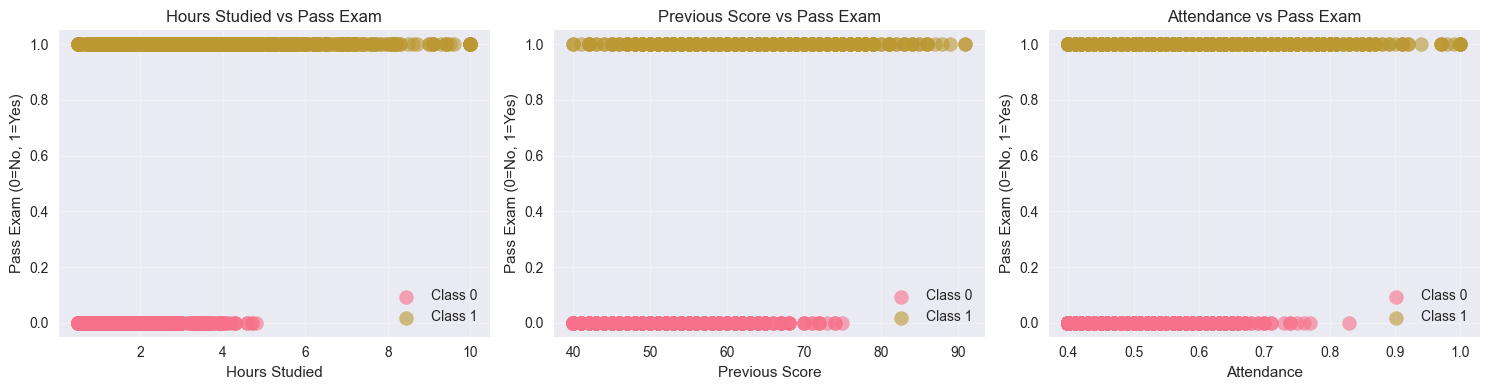

In [18]:
# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Hours Studied vs Pass Exam
for label in [0, 1]:
    data = df[df['pass_exam'] == label]
    axes[0].scatter(data['hours_studied'], data['pass_exam'], 
                    alpha=0.6, label=f'Class {label}', s=100)
axes[0].set_xlabel('Hours Studied')
axes[0].set_ylabel('Pass Exam (0=No, 1=Yes)')
axes[0].set_title('Hours Studied vs Pass Exam')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Previous Score vs Pass Exam
for label in [0, 1]:
    data = df[df['pass_exam'] == label]
    axes[1].scatter(data['previous_score'], data['pass_exam'], 
                    alpha=0.6, label=f'Class {label}', s=100)
axes[1].set_xlabel('Previous Score')
axes[1].set_ylabel('Pass Exam (0=No, 1=Yes)')
axes[1].set_title('Previous Score vs Pass Exam')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Attendance vs Pass Exam
for label in [0, 1]:
    data = df[df['pass_exam'] == label]
    axes[2].scatter(data['attendance'], data['pass_exam'], 
                    alpha=0.6, label=f'Class {label}', s=100)
axes[2].set_xlabel('Attendance')
axes[2].set_ylabel('Pass Exam (0=No, 1=Yes)')
axes[2].set_title('Attendance vs Pass Exam')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 3: Prepare Data for Modeling

We need to separate features (X) from the target variable (y) and split into training and testing sets.


In [19]:
# Separate features and target
X = df[['hours_studied', 'previous_score', 'attendance']]  # Features
y = df['pass_exam']  # Target variable (0 = Fail, 1 = Pass)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify ensures balanced split
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())


Training set size: 960 samples
Testing set size: 240 samples

Training set class distribution:
pass_exam
1    576
0    384
Name: count, dtype: int64

Test set class distribution:
pass_exam
1    144
0     96
Name: count, dtype: int64


## Step 4: Build the Classification Model

We'll use Logistic Regression, which is perfect for binary classification problems. Despite its name, it's a classification algorithm, not regression!


In [20]:
# Create and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Get prediction probabilities (useful for ROC curve)
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

print("Model trained successfully!")
print(f"\nModel coefficients: {model.coef_[0]}")
print(f"Model intercept: {model.intercept_[0]:.4f}")


Model trained successfully!

Model coefficients: [0.75258783 0.11205869 1.17014904]
Model intercept: -8.5927


## Step 5: Evaluate Model Performance

We'll use several metrics to evaluate our classification model:
- **Accuracy**: Percentage of correct predictions
- **Confusion Matrix**: Shows true positives, false positives, true negatives, false negatives
- **Precision**: Of predicted positives, how many were actually positive?
- **Recall (Sensitivity)**: Of actual positives, how many did we catch?
- **F1-Score**: Harmonic mean of precision and recall
- **ROC Curve & AUC**: Measures model's ability to distinguish between classes


In [21]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("=" * 50)
print("ACCURACY SCORES")
print("=" * 50)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Classification report
print("\n" + "=" * 50)
print("CLASSIFICATION REPORT (Test Set)")
print("=" * 50)
print(classification_report(y_test, y_test_pred, 
                          target_names=['Fail', 'Pass']))


ACCURACY SCORES
Training Accuracy: 0.7979 (79.79%)
Test Accuracy: 0.7708 (77.08%)

CLASSIFICATION REPORT (Test Set)
              precision    recall  f1-score   support

        Fail       0.68      0.79      0.73        96
        Pass       0.84      0.76      0.80       144

    accuracy                           0.77       240
   macro avg       0.76      0.77      0.77       240
weighted avg       0.78      0.77      0.77       240



## Step 6: Visualize Results

Let's create visualizations to understand our model's performance better.


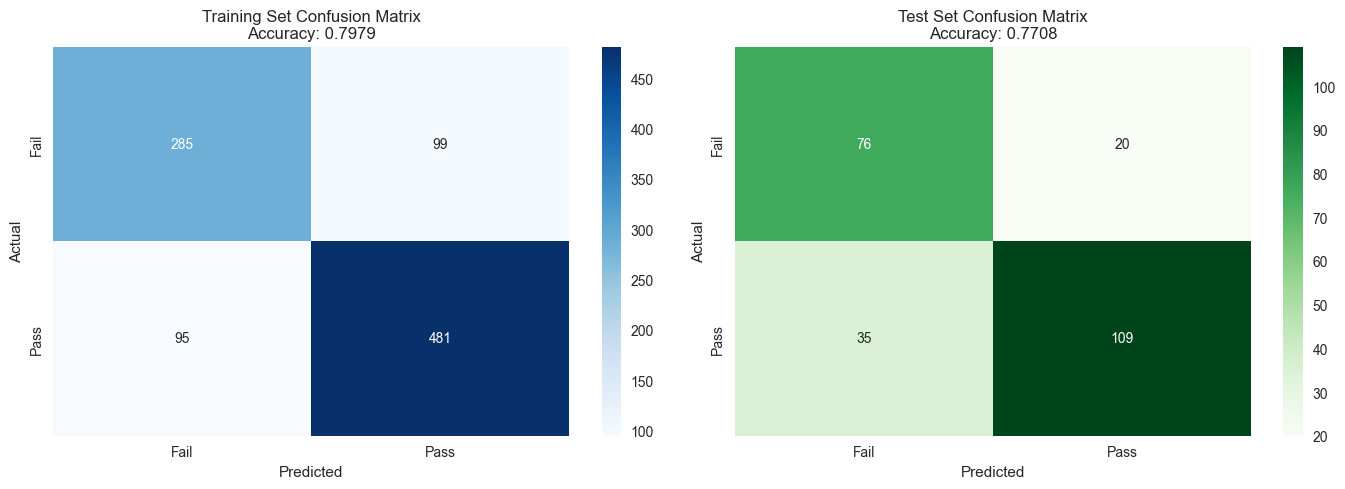


Confusion Matrix Details (Test Set):
True Negatives (TN): 76
False Positives (FP): 20
False Negatives (FN): 35
True Positives (TP): 109


In [22]:
# Create confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
axes[0].set_title(f'Training Set Confusion Matrix\nAccuracy: {train_accuracy:.4f}')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Test set confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
axes[1].set_title(f'Test Set Confusion Matrix\nAccuracy: {test_accuracy:.4f}')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Print confusion matrix details
print("\nConfusion Matrix Details (Test Set):")
print("True Negatives (TN):", cm_test[0, 0])
print("False Positives (FP):", cm_test[0, 1])
print("False Negatives (FN):", cm_test[1, 0])
print("True Positives (TP):", cm_test[1, 1])


## Step 7: ROC Curve

The ROC (Receiver Operating Characteristic) curve shows the trade-off between True Positive Rate and False Positive Rate at different classification thresholds.


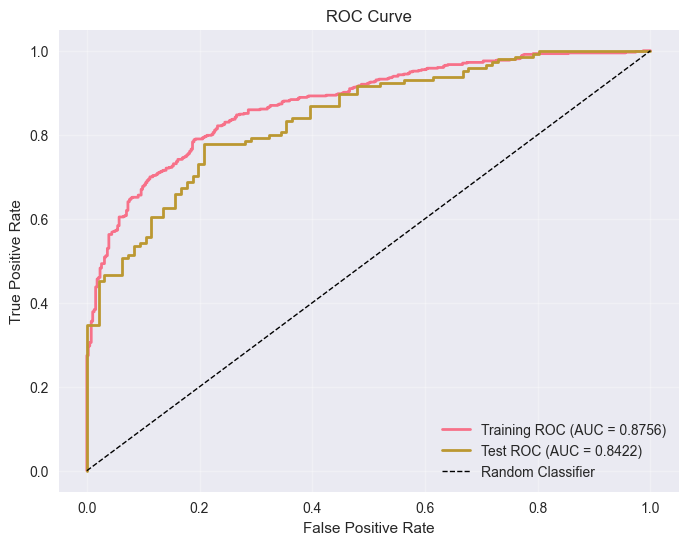


AUC Score - Training: 0.8756, Test: 0.8422
AUC = 1.0: Perfect classifier
AUC = 0.5: Random classifier
AUC > 0.5: Better than random


In [23]:
# Calculate ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calculate AUC (Area Under Curve)
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.4f})', linewidth=2)
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nAUC Score - Training: {auc_train:.4f}, Test: {auc_test:.4f}")
print("AUC = 1.0: Perfect classifier")
print("AUC = 0.5: Random classifier")
print("AUC > 0.5: Better than random")


## Step 8: Make Predictions on New Data

Let's use our trained model to predict whether new students will pass the exam.


In [24]:
# Create new data for prediction
new_students = pd.DataFrame({
    'hours_studied': [4, 7, 2],
    'previous_score': [70, 85, 55],
    'attendance': [0.8, 0.95, 0.65]
})

# Make predictions
predictions = model.predict(new_students)
probabilities = model.predict_proba(new_students)[:, 1]

# Display results
new_students['predicted_pass'] = predictions
new_students['pass_probability'] = probabilities
new_students['prediction'] = new_students['predicted_pass'].map({0: 'Fail', 1: 'Pass'})

print("Predictions for new students:")
print(new_students[['hours_studied', 'previous_score', 'attendance', 
                    'prediction', 'pass_probability']])


Predictions for new students:
   hours_studied  previous_score  attendance prediction  pass_probability
0              4              70        0.80       Pass          0.960755
1              7              85        0.95       Pass          0.999333
2              2              55        0.65       Fail          0.459172


## Key Takeaways

1. **Classification** predicts categorical labels (classes)
2. **Logistic Regression** is a popular algorithm for binary classification
3. **Confusion Matrix** helps us understand where the model makes mistakes
4. **Metrics** like Accuracy, Precision, Recall, and F1-Score provide different insights
5. **ROC Curve & AUC** measure the model's ability to distinguish between classes
6. **Stratified Split** ensures balanced class distribution in train/test sets

## Practice Exercise

Try using only one feature (e.g., 'hours_studied') and see how the model performance changes. Which feature seems most important for predicting exam success?
